Colab에서 konlpy와 mecab 설치하기 참고

https://sanghyu.tistory.com/170

1. bash 셸로 명령어를 입력하여 설치

In [1]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,439 kB]
Hit:12 http://ppa.launchpad.net

2. 환경변수 설정

In [2]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


3. mecab 설치 (시간 좀 걸림)

In [3]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.l

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  2814k      0 --:--:-- --:--:-- --:--:-- 2814k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

4. 동작 확인

In [4]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

In [5]:
mecab = Mecab()
sentence = "지하던전이 이렇게 클지 몰랐습니다. 진짜 깜짝놀랬네요."
mecab.morphs(sentence)

['지하', '던전', '이', '이렇게', '클지', '몰랐', '습니다', '.', '진짜', '깜짝', '놀랬', '네요', '.']

In [6]:
okt = Okt()
okt.morphs(sentence)

['지하', '던전', '이', '이렇게', '클지', '몰랐습니다', '.', '진짜', '깜짝', '놀랬네요', '.']

In [7]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/2차 의도분류/origin_dataframe/refined/final_dataframe.csv')
df.head()

,score,comment,emotion,pred_score,cat,cat_jung
0,5.0,코로나로 인해 사람이 인적이 적어졌지만 비오늘날 서울 시티트어를 하기엔 너무 좋은 ...,2,0.555946,전망대,N서울타워
1,5.0,서울의 전경을 볼 수 있어 너무 좋아요. 서두르세요. 다음엔 남산타워 전망대 티켓까...,2,0.976990,전망대,N서울타워
2,5.0,"분위기 전환, 데이트하러 방문하기 좋은 거 같아요. 비오는 날이라 아쉽지만 그래도 ...",1,0.999509,전망대,N서울타워
3,4.0,서울에 사는 사람들에게는 너무 자주 볼 수 있어서 막상 살면서 몇번 안 올라가게 되...,1,0.998982,전망대,N서울타워
4,4.0,필수코스. 나 자신은 서울사람으로 여러번 다녀왔지만 아기와 남편을 위해 가 봄. 서...,2,0.916359,전망대,N서울타워


In [8]:
import re
from collections import Counter

def word_list(df):
  df_copy = df.copy()
  df_copy['noun'] = df_copy['comment'].apply(lambda x : mecab.nouns(x))
  words = sum(df_copy['noun'].values.tolist(), [])
  noun_list = []
  for word in words:
    if len(word) > 1 :
      noun_list.append(word)
  return noun_list

def most_common(list_name):
  count = Counter(list_name)
  words = dict(count.most_common())
  return words


In [ ]:
# 전체 관광지 부정 키워드 워드클라우드 for문
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

for location in df['cat_jung'].unique():
  wdf = df[(df['cat_jung'] == location ) & (df['emotion'] == 0) ]
  neg_list = word_list(wdf)
  neg_dic = most_common(neg_list)
  plt.figure(figsize = (15,10))
  wordcloud = WordCloud('/content/drive/MyDrive/2차 의도분류/wordcloud/font/NanumBarunGothic.ttf', background_color = 'white',
                        width = 1500, height = 1000).generate_from_frequencies(neg_dic) 
  wordcloud.recolor(color_func = mixed_color_func)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.savefig(f'/content/drive/MyDrive/2차 의도분류/wordcloud/results/{location}.jpg', bbox_inches='tight', pad_inches=0, dpi = 200)

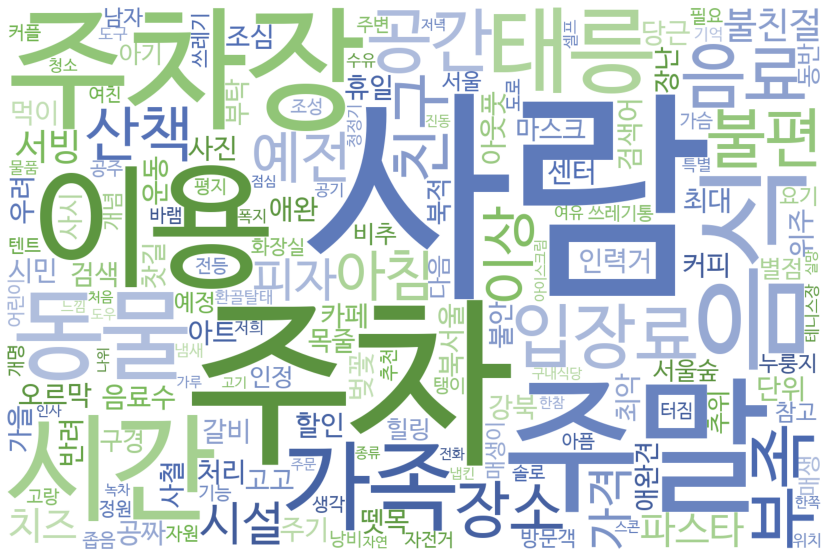

In [52]:
# 개별 관광지 부정 키워드 워드클라우드 (불용어 처리)
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

def mixed_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},40%, {:d}%)".format(np.random.choice([222,100]), np.random.randint(40,80)))

location = '북악팔각정'
wdf = df[(df['cat_jung'] == location ) & (df['emotion'] == 0) ]
neg_list = word_list(wdf)

stopwords = ['때문', '텐데', '건지', '따름', '중임', '에세', '그놈', '아무', '무엇', '옥집',
             '복판', '라오', '연도', '그게', '가본', '만큼', '이터', '엘레', '량제', '까스',
             '꺼리', '정도', '군데', '조금', '을시', '당교', '아시', '등등', '듯이', '어함',
             '걸까', '리모', '비오', '갈만', '대비', '먼데', '기거', '도슨', '관련', '물놀',
             '걸로', '이번', '레이', '킹크', '회치', '여긴', '자기', '이거', '인데', '개산',
             '동도', '동안', '만큼', '시장', '마리', '대신', '지브', '드포', '서요', '갈일', '그때',
             '수율', '거기', '노량', '어디', '당신', '나라', '보가', '여기', '마다', '조그', '페스',
             '지안', '왕산', '그건', '잡처', '뭔가', '원래', '연관',  '하나', '궁을',  '아무것', '걸까요', '이후', '구요', '덕수궁', '덕스',
             '이곳', '획관', '걸요', '뭐뭐', '카멘', '노관', '크로', '공원', '나기', '랜드',
             '경우', '건가', '시절', '말자', '그것', '아이', '북서울꿈의숲', '개산', '나스']

filtered_words = []
for word in neg_list:
  if word not in stopwords:
    filtered_words.append(word)

neg_dic = most_common(filtered_words)
plt.figure(figsize = (15,10))
wordcloud = WordCloud('/content/drive/MyDrive/2차 의도분류/wordcloud/font/NanumBarunGothic.ttf', background_color = 'white',
                      width = 1500, height = 1000).generate_from_frequencies(neg_dic) 
wordcloud.recolor(color_func = mixed_color_func)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig(f'/content/drive/MyDrive/2차 의도분류/wordcloud/results/{location}.jpg', bbox_inches='tight', pad_inches=0, dpi = 200)

In [49]:
df[df.comment.str.contains('까스')]

,score,comment,emotion,pred_score,cat,cat_jung
10,5.0,서울 어디든 보이는 서울의 랜드마크중 하나입니다. 돈까스 먹고 케이블카 타고 올라가...,2,0.999894,전망대,N서울타워
22,5.0,옛 동기들과 거닐던 남산길을 나홀로 걸어보았다..넘 좋다... 타워..숲..서약의 ...,2,0.999910,전망대,N서울타워
108,5.0,눈올때 혹은 봄가을 시즌으로 꽃피거나 단풍있을때 오시면 사진찍기 좋은 곳!! 그리고...,2,0.999934,전망대,N서울타워
129,5.0,푸릇푸릇한 남산타워가서 케이블카탔어요내려와서는 돈까스먹구요 웨이팅많이없었어요,2,0.999910,전망대,N서울타워
239,5.0,멋진곳인..돈까스도 추억 쌓는데 도움됨,2,0.999746,전망대,N서울타워
...,...,...,...,...,...,...
111711,5.0,서울의 진정한 야경 스팟입니다. 개인차량을 가지고 갈수 없는 점이 불편하게 느낄수도...,2,0.501707,전망대,N서울타워
111823,5.0,"남산타워는 명동이랑 위치상 가까워서 걸어가도 될 정도이며, 높은 곳에 위치해 상쾌한...",2,0.999926,전망대,N서울타워
111855,5.0,외국인들이 참 좋아해요 별거 없는데도 케이블카와 야경과 분위기가 넘 좋네요 자물쇠와...,2,0.999891,전망대,N서울타워
111887,5.0,서울구경은 여기서부터 시작하세요.남산 왕 돈까스로 점심을 채우고케이블카를 타고 남산...,1,0.982773,전망대,N서울타워


In [ ]:
import re
def word_list(df):
  df_copy = df.copy()
  df_copy['noun'] = df_copy['comment'].apply(lambda x : mecab.nouns(x))
  words = sum(df_copy['noun'].values.tolist(), [])
  noun_list = []
  for word in words:
    if len(word) > 1 :
      noun_list.append(word)
  return noun_list

seoul_tower_neg = word_list(wdf)
print(seoul_tower_neg)

['산책', '사람', '남산', '케이블', '남산', '타워', '핸드폰', '멤버', '본인', '할인', '동행인', '인주', '차비', '시간', '원배', '배꼽', '사람', '남산', '타워', '화장실', '아기', '기저귀', '이대', '변한', '남산', '타워', '네이버', '서울', '명소', '차비', '물가', '생각', '산책', '사람', '예전', '추석', '당일', '케이블카', '이용료', '왕복', '시간', '풍경', '거리', '전망대', '비용', '식당', '특별', '볼거리', '거리', '전망대', '하나', '생각', '추석', '코로나', '상황', '인파', '혼잡', '전망대', '구름', '연인', '자물쇠', '타워', '비용', '아메리카노', '커피', '장독', '머그', '실망', '커피', '식사', '이곳', '저녁', '마감', '음료', '진열', '인기', '케익', '조각', '커피', '딸기', '생크림', '케이그', '이곳', '시그', '설탕', '범벅', '당뇨', '케이블카', '주차장', '혼잡', '케이블카', '추억', '장소', '구경거리', '코로나', '남산', '타워', '인적', '처음', '느낌', '타워', '여친', '사랑', '열쇠', '볼거리', '코로나', '야외', '남산', '사람', '음료', '하나', '거리', '나중', '케이블카', '미세먼지', '때문', '서울', '건물', '전망대', '관람', '가격', '대비', '만족도', '음연', '맥스', '서울', '랜드마크', '마을버스', '버스', '사람', '남산', '남산', '타워', '운동', '케이블카', '거짓말', '자물쇠', '야경', '선명', '코로나', '시국', '사람', '거리', '석재', '오염', '화장실', '실리콘', '곰팡이', '한국', '최고', '관광지', '관리', '소홀', '볼거리', '입장료', '아래', '자물쇠', '추천',

In [ ]:
# counter 딕셔너리 사용자 함수
from collections import Counter
def most_common(list_name):
  count = Counter(list_name)
  words = dict(count.most_common())
  return words
seoul_tower_neg_dic = most_common(seoul_tower_neg)
print(seoul_tower_neg_dic)

{'사람': 238, '시간': 206, '케이블카': 191, '전망대': 134, '타워': 129, '가격': 88, '대기': 83, '남산': 79, '서울': 66, '생각': 64, '주차': 64, '야경': 63, '주말': 46, '엘리베이터': 44, '주차장': 42, '직원': 39, '정도': 35, '거리': 34, '때문': 34, '이용': 32, '추천': 29, '차비': 28, '우리': 28, '전망': 27, '코로나': 26, '구경': 26, '티켓': 26, '비용': 25, '버스': 25, '관광객': 25, '요금': 25, '사진': 25, '케이블': 24, '왕복': 24, '실망': 24, '하나': 23, '대비': 23, '외국인': 22, '운행': 21, '이상': 20, '인원': 20, '볼거리': 19, '필요': 19, '입장': 19, '날씨': 19, '기분': 18, '불편': 18, '방문': 18, '편도': 18, '이터': 17, '저녁': 16, '미세먼지': 16, '탑승': 16, '아이': 16, '평일': 16, '느낌': 15, '운영': 15, '안내': 15, '엘레': 15, '최악': 14, '자물쇠': 13, '관람': 13, '친절': 13, '건지': 13, '기억': 13, '할인': 12, '처음': 12, '사랑': 12, '관리': 12, '주변': 12, '시설': 12, '다음': 12, '매표소': 12, '망대': 12, '가게': 12, '유리': 11, '비추': 11, '불친절': 11, '예약': 11, '부족': 11, '네이버': 10, '추석': 10, '풍경': 10, '식당': 10, '개선': 10, '관광': 10, '추억': 9, '가능': 9, '엘베': 9, '완전': 9, '중국': 9, '별거': 9, '불빛': 9, '금액': 9, '경우': 9, '상점': 9, '도착': 9, '꼭대기': 9, '산책': 8